# Credit Card Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing 

Data can be found at https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df['Class'].value_counts()        # very imbalanced data

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
df['Class'].value_counts()/df['Class'].count()

Class
0    0.998273
1    0.001727
Name: count, dtype: float64

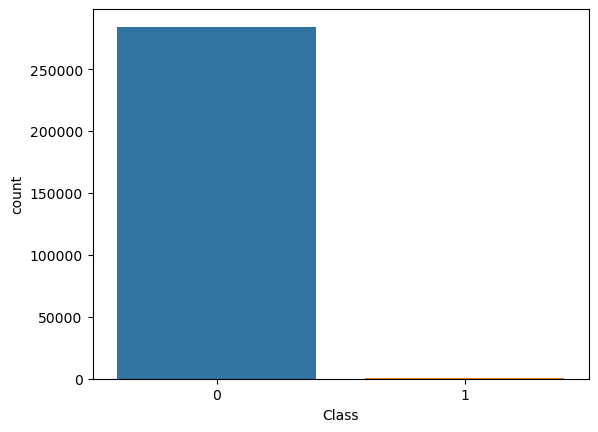

In [7]:
sns.countplot(df, x='Class');   

### Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop(columns=['Class'])
y = df['Class']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)

In [11]:
y_train.value_counts()

Class
0    213236
1       369
Name: count, dtype: int64

In [12]:
y_test.value_counts()

Class
0    71079
1      123
Name: count, dtype: int64

In [13]:
y_train.value_counts()/y_test.value_counts()

Class
0    2.999986
1    3.000000
Name: count, dtype: float64

### Scaling the data 

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Random Forest Classification

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
clf_rf = RandomForestClassifier(class_weight='balanced')
clf_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced')

In [19]:
y_pred = clf_rf.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
target_names = ['Legal','Fraudulent']
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Legal       1.00      1.00      1.00     71079
  Fraudulent       0.95      0.76      0.84       123

    accuracy                           1.00     71202
   macro avg       0.97      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202



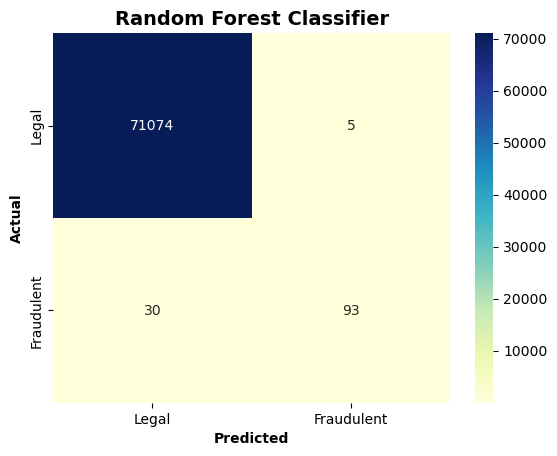

In [22]:
labels = [0,1]
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=labels)
classes = ['Legal', 'Fraudulent']
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
sns.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Random Forest Classifier', fontdict={'fontsize':14, 'weight': 'bold'})
plt.xlabel('Predicted', fontdict={'fontsize':10, 'weight': 'bold'})
plt.ylabel('Actual', fontdict={'fontsize':10, 'weight': 'bold'})
plt.show()

## Naive Bayes Classification

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
gnb = GaussianNB()
gnb_classifier = gnb.fit(X_train_scaled, y_train)
y_pred = gnb_classifier.predict(X_train_scaled)

In [25]:
target_names = ['Legal','Fraudulent']       
print(classification_report(y_true=y_train, y_pred=y_pred, target_names=target_names))     # train set

              precision    recall  f1-score   support

       Legal       1.00      0.98      0.99    213236
  Fraudulent       0.06      0.83      0.12       369

    accuracy                           0.98    213605
   macro avg       0.53      0.91      0.55    213605
weighted avg       1.00      0.98      0.99    213605



In [26]:
y_pred_proba = gnb_classifier.predict_proba(X_train_scaled)
y_pred_proba

array([[1.00000000e+00, 5.86340270e-18],
       [1.00000000e+00, 5.56714370e-18],
       [1.00000000e+00, 7.23538551e-18],
       ...,
       [1.00000000e+00, 5.42198166e-17],
       [1.00000000e+00, 2.17319131e-17],
       [1.00000000e+00, 3.82189432e-18]])

In [27]:
y_pred_proba = y_pred_proba[:,1]
y_pred_proba

array([5.86340270e-18, 5.56714370e-18, 7.23538551e-18, ...,
       5.42198166e-17, 2.17319131e-17, 3.82189432e-18])

### Finding the optimal threshold

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

In [29]:
fpr, tpr, threshold = roc_curve(y_train, y_pred_proba)

In [30]:
threshold

array([           inf, 1.00000000e+00, 1.00000000e+00, ...,
       7.48578565e-19, 7.47927556e-19, 2.12155140e-22])

In [31]:
threshold[0] = 0.999

In [32]:
threshold

array([9.99000000e-01, 1.00000000e+00, 1.00000000e+00, ...,
       7.48578565e-19, 7.47927556e-19, 2.12155140e-22])

In [33]:
tpr

array([0.        , 0.75609756, 0.75609756, ..., 1.        , 1.        ,
       1.        ])

In [34]:
fpr

array([0.        , 0.01137238, 0.01137707, ..., 0.99567615, 0.99568553,
       1.        ])

In [35]:
def optimal_threshold(y_true, y_score):
    """
   Find the optimal threshold at which tpr = tnr
   """
   
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    threshold[0] = 0.9999
    true_rates = pd.DataFrame(data={'threshold': pd.Series(threshold), 'tpr': pd.Series(tpr), 
                               'tnr': pd.Series(1-fpr), 'tpr-tnr': pd.Series(tpr-(1-fpr))})
    optimal = true_rates.abs().sort_values(by='tpr-tnr').iloc[0]
    print(optimal)
   
    # Plot tpr and tnr
    plt.plot(tpr)
    plt.plot(1-fpr)
    plt.title('TPR and TNR')
    plt.show()
    
    return optimal.threshold

threshold    6.400404e-13
tpr          9.078591e-01
tnr          9.082425e-01
tpr-tnr      3.834321e-04
Name: 322, dtype: float64


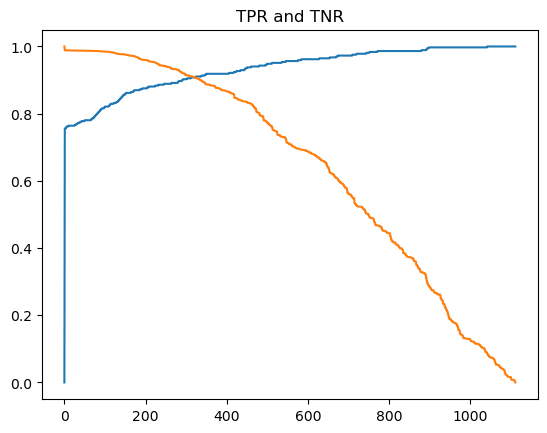

6.40040385222885e-13

In [36]:
optimal_threshold(y_train, y_pred_proba)

### Testing GNB Classifier

In [37]:
y_pred_proba = gnb_classifier.predict_proba(X_test_scaled)[:, 1]

In [38]:
y_pred = np.where(y_pred_proba>6.40040385222885e-13, 1, 0)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     71079
           1       0.02      0.91      0.03       123

    accuracy                           0.91     71202
   macro avg       0.51      0.91      0.49     71202
weighted avg       1.00      0.91      0.95     71202



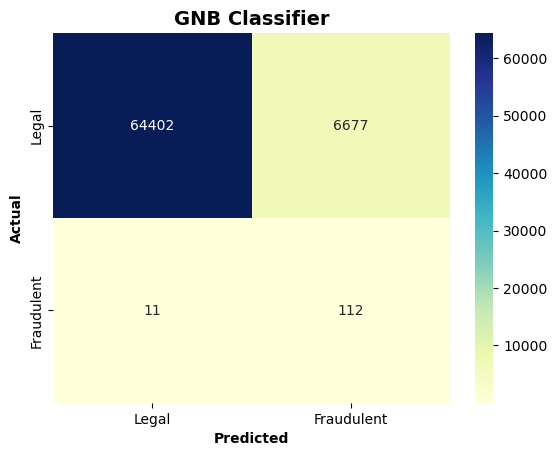

In [40]:
labels = [0,1]
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=labels)
classes = ['Legal', 'Fraudulent']
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
sns.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title('GNB Classifier', fontdict={'fontsize':14, 'weight': 'bold'})
plt.xlabel('Predicted', fontdict={'fontsize':10, 'weight': 'bold'})
plt.ylabel('Actual', fontdict={'fontsize':10, 'weight': 'bold'})
plt.show()

In [41]:
AUROC = roc_auc_score(y_test, y_pred)
print(f'The area under the ROC Curve for GNB classifier is {AUROC * 100:.2f} %')

The area under the ROC Curve for GNB classifier is 90.83 %


## ANN Classification

## Creating the Model

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [43]:
len(X_train.columns)

30

In [44]:
X_train.shape

(213605, 30)

In [47]:
model = Sequential()
model.add(Dense(30, input_shape=(30,) , activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 15)                465       
                                                                 
 dense_6 (Dense)             (None, 7)                 112       
                                                                 
 dense_7 (Dense)             (None, 1)                 8         
                                                                 
Total params: 1515 (5.92 KB)
Trainable params: 1515 (5.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Handle Imbalanced Data

In [49]:
y_train.value_counts()    

Class
0    213236
1       369
Name: count, dtype: int64

In [50]:
weight_for_1 = np.round(len(y_train[y_train==0])/len(y_train[y_train==1]), 2)
weight_for_1

577.88

In [51]:
class_weight = {0: 1, 1: weight_for_1}

In [52]:
results = model.fit(X_train_scaled, y_train, batch_size=1024, epochs=50, verbose=1, validation_data=(X_test_scaled, y_test))
results

Epoch 1/50


209/209 [==============================] - 2s 4ms/step - loss: 0.0649 - accuracy: 0.9983 - val_loss: 0.0118 - val_accuracy: 0.9983
Epoch 2/50
209/209 [==============================] - 1s 3ms/step - loss: 0.0115 - accuracy: 0.9983 - val_loss: 0.0107 - val_accuracy: 0.9983
Epoch 3/50
209/209 [==============================] - 1s 2ms/step - loss: 0.0095 - accuracy: 0.9983 - val_loss: 0.0077 - val_accuracy: 0.9986
Epoch 4/50
209/209 [==============================] - 1s 2ms/step - loss: 0.0065 - accuracy: 0.9986 - val_loss: 0.0053 - val_accuracy: 0.9988
Epoch 5/50
209/209 [==============================] - 1s 2ms/step - loss: 0.0049 - accuracy: 0.9989 - val_loss: 0.0045 - val_accuracy: 0.9990
Epoch 6/50
209/209 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.0040 - val_accuracy: 0.9991
Epoch 7/50
209/209 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoc

In [53]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.064946,0.998273,0.011813,0.998273
1,0.011525,0.998273,0.010710,0.998273
2,0.009535,0.998273,0.007664,0.998567
3,0.006519,0.998577,0.005293,0.998834
4,0.004886,0.998942,0.004520,0.999031
5,0.004272,0.999134,0.004038,0.999129
6,0.003986,0.999204,0.003968,0.999298
7,0.003801,0.999270,0.003926,0.999185
8,0.003708,0.999284,0.003782,0.999354
9,0.003571,0.999331,0.003542,0.999382


In [54]:
model.evaluate(X_test_scaled, y_test)

2226/2226 [==============================] - 2s 1ms/step - loss: 0.0032 - accuracy: 0.9994


[0.0031894356943666935, 0.9993960857391357]

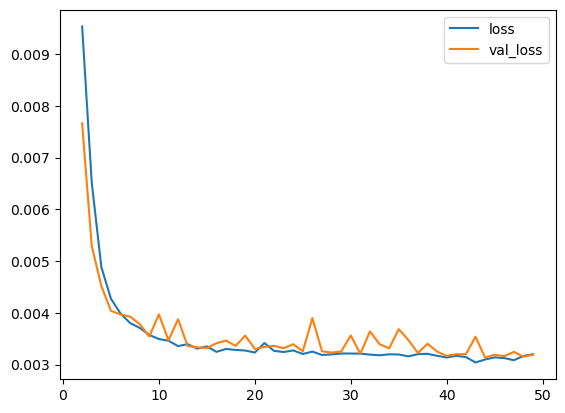

In [55]:
metrics.loc[2:,['loss','val_loss']].plot();

In [56]:
y_train_proba = model.predict(X_train_scaled)

6676/6676 [==============================] - 6s 918us/step


threshold    0.000371
tpr          0.926829
tnr          0.926715
tpr-tnr      0.000114
Name: 324, dtype: float64


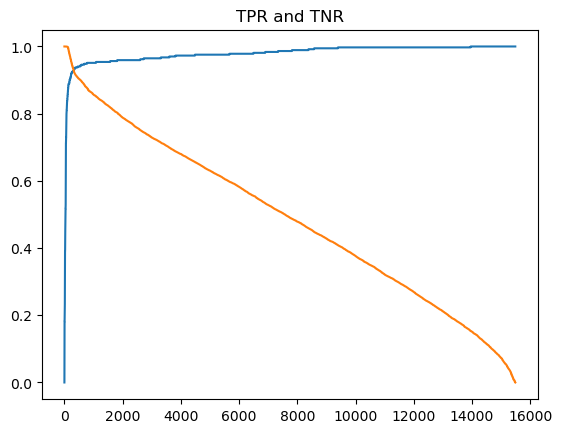

0.0003714534395840019

In [57]:
optimal_threshold(y_train, y_train_proba)

### Testing ANN Classifier 

In [58]:
y_test_proba = model.predict(X_test_scaled)

2226/2226 [==============================] - 2s 965us/step


In [59]:
y_pred = np.where(y_test_proba>0.00037, 1, 0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [60]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     71079
           1       0.02      0.95      0.04       123

    accuracy                           0.93     71202
   macro avg       0.51      0.94      0.50     71202
weighted avg       1.00      0.93      0.96     71202



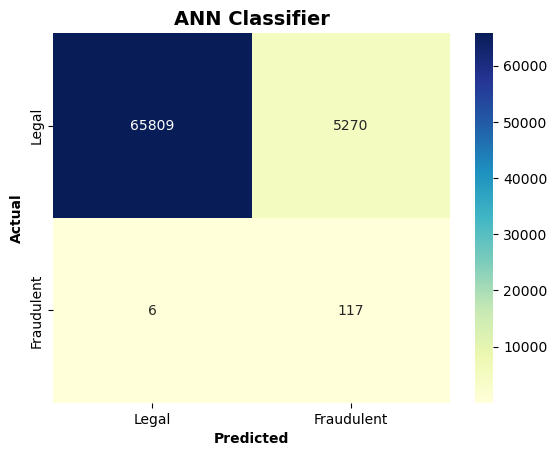

In [61]:
labels = [0,1]
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=labels)
classes = ['Legal', 'Fraudulent']
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
sns.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title('ANN Classifier', fontdict={'fontsize':14, 'weight': 'bold'})
plt.xlabel('Predicted', fontdict={'fontsize':10, 'weight': 'bold'})
plt.ylabel('Actual', fontdict={'fontsize':10, 'weight': 'bold'})
plt.show()

In [62]:
AUROC = roc_auc_score(y_test, y_pred)
print(f'The area under the ROC Curve for ANN classifier is {AUROC * 100:.2f} %')

The area under the ROC Curve for ANN classifier is 93.85 %


In [63]:
mis_f = 100 * cm[1,0]/cm[1].sum()
mis_f

4.878048780487805

In [66]:
print("Percentage of mislabeled fraudulent transactions is : %.1f " % mis_f )

Percentage of mislabeled fraudulent transactions is : 4.9 


In [65]:
model.save('fraud_detector_model.h5')